## Problem 1 - Build Convolution Neural Network with Lenet Model

In [ ]:
import tensorflow as tf

In [ ]:
# Define basic parameters
output_size = 10
img_size = 28

# Build the LeNet-5 model
lenet_model = tf.keras.models.Sequential([
    # C1: Convolution layer with 6 filters, kernel size 5×5, 'same' padding, input channels=3.
    tf.keras.layers.Conv2D(filters=6, kernel_size=5,
                           activation='relu',
                           input_shape=(img_size, img_size, 3),
                           padding='same'),
    # S2: Average Pooling layer reducing spatial dimension to 14×14.
    tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
    # C3: Convolution layer with 16 filters, kernel size 5×5, no padding (valid) reduces dimensions from 14×14 to 10×10.
    tf.keras.layers.Conv2D(filters=16, kernel_size=5,
                           activation='relu',
                           padding='valid'),
    # S4: Average Pooling layer reducing spatial dimension from 10×10 to 5×5.
    tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
    # Flatten the output to feed into dense layers.
    tf.keras.layers.Flatten(),
    # C5: Dense layer with 120 units.
    tf.keras.layers.Dense(units=120, activation='relu'),
    # F6: Dense layer with 84 units.
    tf.keras.layers.Dense(units=84, activation='relu'),
    # Output layer: Dense layer with number of units equal to output_size.
    tf.keras.layers.Dense(units=output_size, activation='softmax')
])

# Print the summary of the model
lenet_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

## Problem 2 - Build Networks Using Blocks (VGG16)

In [ ]:
output_size = 1000
img_size = 224

vgg16_model = tf.keras.models.Sequential([
    # 1st Conv Block
    tf.keras.layers.Conv2D(64, (3, 3),
                           activation='relu',
                           padding='same',
                           input_shape=(img_size, img_size, 3)),
    tf.keras.layers.Conv2D(64, (3, 3),
                           activation='relu',
                           padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                              strides=(2, 2)),

    # 2nd Conv Block
    tf.keras.layers.Conv2D(128, (3, 3),
                           activation='relu',
                           padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3),
                           activation='relu',
                           padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                              strides=(2, 2)),

    # 3rd Conv block
    tf.keras.layers.Conv2D(256, (3, 3),
                           activation='relu',
                           padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3),
                           activation='relu',
                           padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3),
                           activation='relu',
                           padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                              strides=(2, 2)),

    # 4th Conv block
    tf.keras.layers.Conv2D(512, (3, 3),
                           activation='relu',
                           padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3),
                           activation='relu',
                           padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3),
                           activation='relu',
                           padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                              strides=(2, 2)),

    # 5th Conv block
    tf.keras.layers.Conv2D(512, (3, 3),
                           activation='relu',
                           padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3),
                           activation='relu',
                           padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3),
                           activation='relu',
                           padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                              strides=(2, 2)),

    # Fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax'),
])

vgg16_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

## Problem 3 - Image classification using Lenet and VGG16

### 3.1 - Concrete crack dataset

#### Load data

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from imutils import paths
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.i8mage import ImageDataGenerator
from keras.models import load_model

In [ ]:
path = "/content/save_model"
os.mkdir(path)

In [ ]:
!pip install GitPython
from git import Repo

In [ ]:
filepath = 'temp_concrete_crack'
Repo.clone_from('https://github.com/bimewok/Concrete-Crack-Image-Classifier', filepath)

<git.repo.base.Repo '/content/temp_concrete_crack/.git'>

In [ ]:
base_dir = '/content/temp_concrete_crack/data/concrete_images'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')



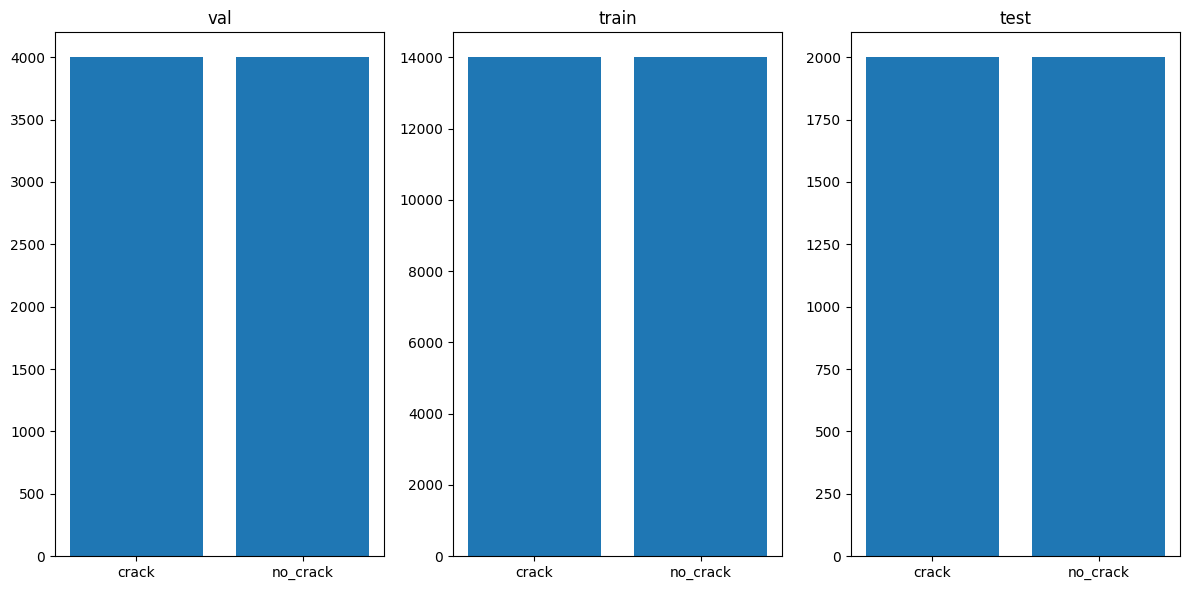

In [ ]:
def show_labels(data_dir):
    data = os.listdir(data_dir)
    fig, ax = plt.subplots(1, len(data), figsize=(12,6))
    for idx in range(len(data)):
        sub_dir = os.path.join(data_dir, data[idx])
        labels = os.listdir(sub_dir)
        list_data = []
        for label in labels:
            image_files = list(paths.list_images(os.path.join(sub_dir, label)))
            list_data.append(len(image_files))
        ax[idx].bar(labels, list_data)
        ax[idx].set_title(data[idx])
        # ax[idx].axis('off')
    plt.tight_layout()
    plt.show()

show_labels(base_dir)

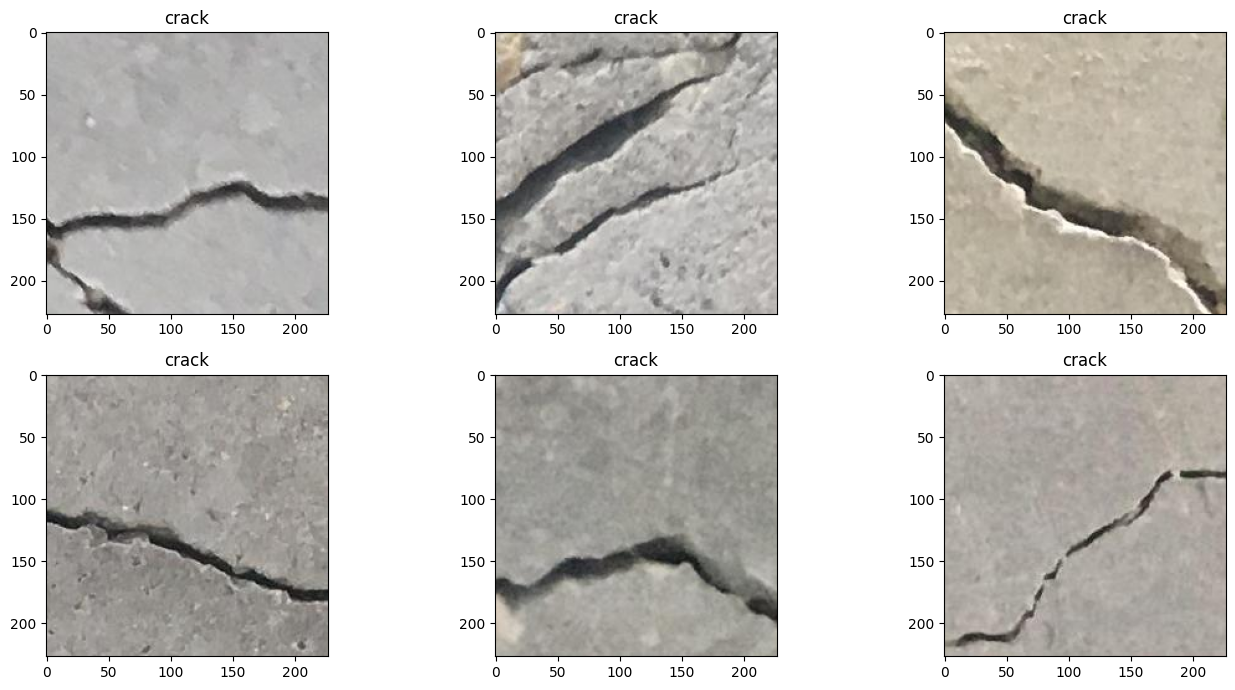

In [ ]:
def plot_images(data_dir, label, num_sample=6):
    data_dir = os.path.join(data_dir, label)
    image_files = list(paths.list_images(data_dir))[:num_sample]
    fig, ax = plt.subplots(2,num_sample//2, figsize=(14,7))
    for i, image_dir in enumerate(image_files):
        img = mpimg.imread(image_dir)
        ax[i//(num_sample//2)][i%(num_sample//2)].imshow(img)
        ax[i//(num_sample//2)][i%(num_sample//2)].set_title(label)
    plt.tight_layout()
    plt.show()

plot_images(train_dir, label="crack")

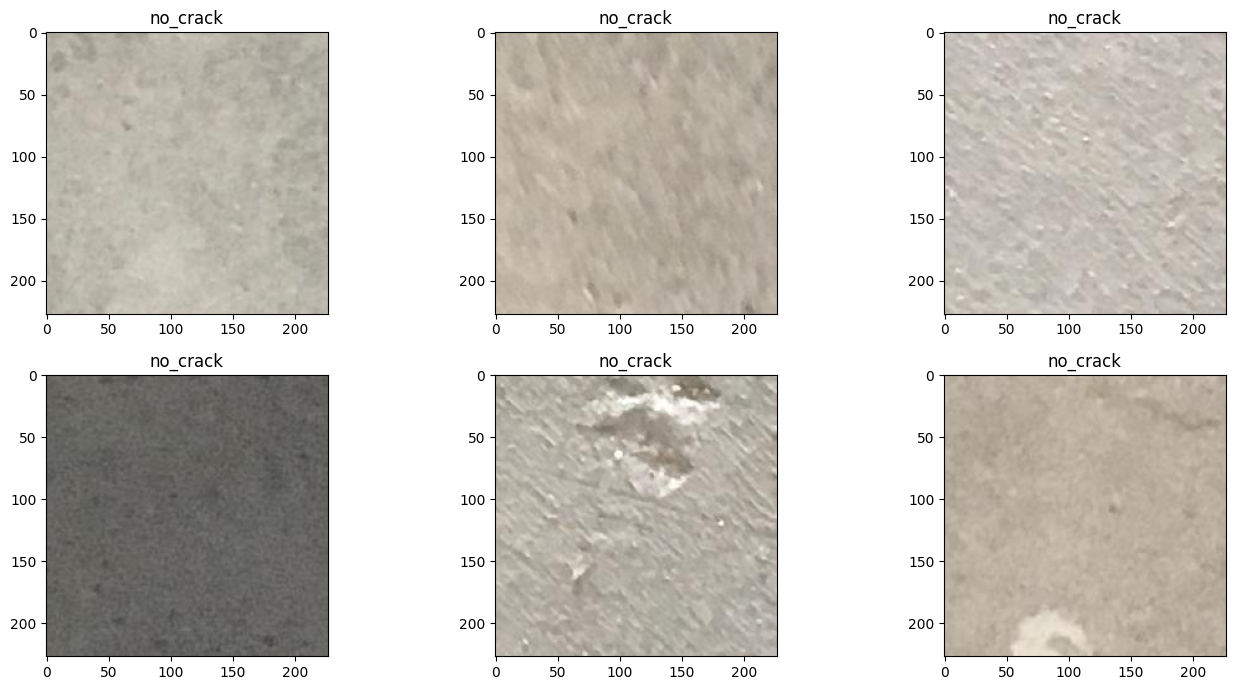

In [ ]:
plot_images(train_dir, label="no_crack")

#### Preprocessing

In [ ]:
img_size = 150 # img.shape[0] = 227
output_size = 1 #Use sigmoid function
batch_size = 256

train_datagen = ImageDataGenerator( rescale=1.0/255.0,
                                    rotation_range=30,
                                    zoom_range=0.15,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.15,
                                    horizontal_flip=True,
                                    fill_mode="nearest" )

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_dataloader = train_datagen.flow_from_directory(train_dir,
                                                     class_mode='binary',
                                                     batch_size=batch_size,
                                                     target_size=(img_size, img_size))

valid_dataloader = val_datagen.flow_from_directory(valid_dir,
                                         class_mode='binary',
                                         batch_size=batch_size,
                                         target_size=(img_size, img_size))

test_dataloader = test_datagen.flow_from_directory(test_dir,
                                           class_mode='binary',
                                           batch_size=batch_size,
                                           target_size=(img_size, img_size))

Found 28000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


#### Model LeNet

In [ ]:

lenet_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(img_size, img_size, 3)),

    # S2: Average Pooling layer
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), strides=2),

    # C3: Conv layer with 16 filters, kernel size 5x5
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),

    # S4: Average Pooling layer
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), strides=2),

    # Flatten before going into dense layers
    tf.keras.layers.Flatten(),

    # C5: Fully connected layer with 120 units
    tf.keras.layers.Dense(units=120, activation='relu'),

    # F6: Fully connected layer with 84 units
    tf.keras.layers.Dense(units=84, activation='relu'),

    # Output layer: 1 unit (e.g., for binary classification)
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # or 'softmax' for multi-class
])

lenet_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 146, 146, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 73, 73, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 69, 69, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 34, 34, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 120)            │     2,219,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,232,761 (8.52 MB)

 Trainable params: 2,232,761 (8.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lenet_model.compile(optimizer='adam',loss="binary_crossentropy", metrics=['accuracy'])
lenet_model.summary()

num_epochs = 10

checkpoint_path = "/content/save_model/lenet_concrete_crack.weights.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            verbose=1,
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

history = lenet_model.fit(train_dataloader,
                        epochs = num_epochs,
                        validation_data = valid_dataloader,
                        callbacks=[model_checkpoint, learning_rate_reduction])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 146, 146, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 73, 73, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 69, 69, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 34, 34, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 120)            │     2,219,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,232,761 (8.52 MB)

 Trainable params: 2,232,761 (8.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
 67/110 ━━━━━━━━━━━━━━━━━━━━ 1:01 1s/step - accuracy: 0.7047 - loss: 0.5769

KeyboardInterrupt: 

KeyError: 'accuracy'

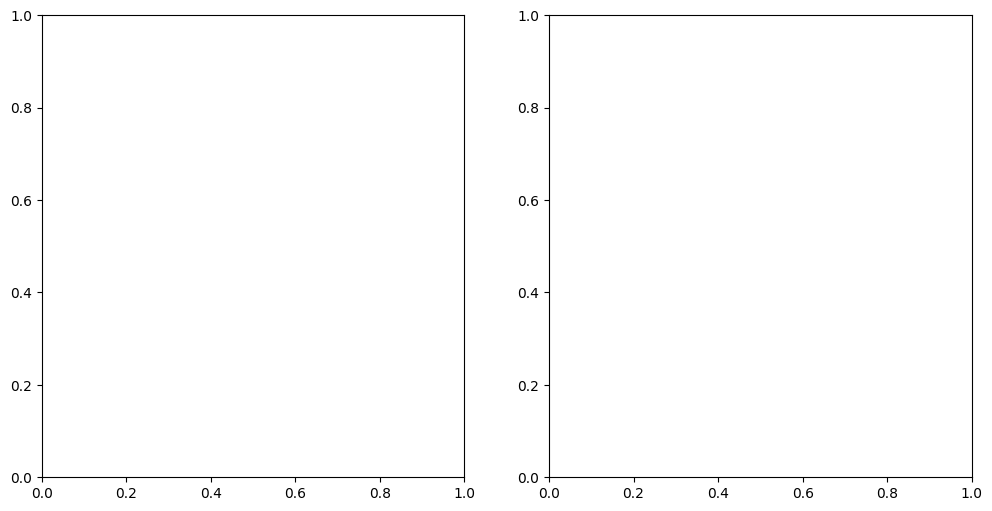

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(lenet_model.history.history['accuracy'])), lenet_model.history.history['accuracy'], linewidth = 5, label = "training")
axs[0].plot(range(len(lenet_model.history.history['accuracy'])), lenet_model.history.history['val_accuracy'], linewidth = 5, label = "validation")
axs[1].plot(range(len(lenet_model.history.history['loss'])), lenet_model.history.history['loss'], linewidth = 5, label = "training")
axs[1].plot(range(len(lenet_model.history.history['loss'])), lenet_model.history.history['val_loss'], linewidth = 5, label = "validation")
axs[0].set_xlabel("epochs")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")
axs[1].set_ylabel("loss")
plt.legend()

In [ ]:
lenet_model.load_weights("/content/save_model/lenet_concrete_crack.h5")
loss, accuracy = lenet_model.evaluate(test_dataloader, steps=len(test_dataloader), verbose=1)

#### Model VGG-16

In [ ]:
import tensorflow as tf

vgg16_model = tf.keras.models.Sequential([
    # 1st Conv Block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                           input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    # 2nd Conv Block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    # 3rd Conv Block
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    # 4th Conv Block
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    # 5th Conv Block
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    # Fully Connected Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # use softmax + units=N for multi-class
])

vgg16_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

vgg16_model.summary()

# vgg16_model.compile(optimizer='adam',loss="binary_crossentropy", metrics=['accuracy'])


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4096)           │    33,558,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,058,625 (248.18 MB)

 Trainable params: 65,058,625 (248.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
num_epochs = 10

checkpoint_path = "/content/save_model/base_vgg16_concrete_crack.weights.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            verbose=1,
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

history = vgg16_model.fit(train_dataloader,
                                epochs = num_epochs,
                                validation_data = valid_dataloader,
                                callbacks=[model_checkpoint, learning_rate_reduction])

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4954 - loss: 0.7284
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/save_model/base_vgg16_concrete_crack.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 470s 3s/step - accuracy: 0.4953 - loss: 0.7282 - val_accuracy: 0.5000 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5091 - loss: 0.6935
Epoch 2: val_accuracy did not improve from 0.50000
110/110 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.5090 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5034 - loss: 0.6932
Epoch 3: val_accuracy did not improve from 0.50000

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
110/110 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.5034 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 4/10
110

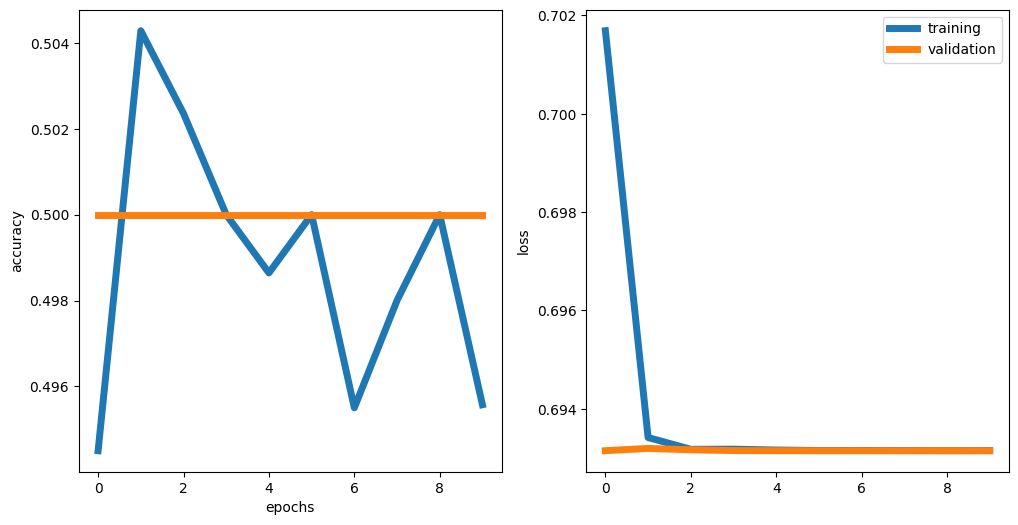

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(vgg16_model.history.history['accuracy'])), vgg16_model.history.history['accuracy'], linewidth = 5, label = "training")
axs[0].plot(range(len(vgg16_model.history.history['accuracy'])), vgg16_model.history.history['val_accuracy'], linewidth = 5, label = "validation")
axs[1].plot(range(len(vgg16_model.history.history['loss'])), vgg16_model.history.history['loss'], linewidth = 5, label = "training")
axs[1].plot(range(len(vgg16_model.history.history['loss'])), vgg16_model.history.history['val_loss'], linewidth = 5, label = "validation")
axs[0].set_xlabel("epochs")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")
axs[1].set_ylabel("loss")
plt.legend()

In [ ]:
vgg16_model.load_weights("/content/save_model/base_vgg16_concrete_crack.weights.h5")
loss, accuracy = vgg16_model.evaluate(test_dataloader, verbose=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5031 - loss: 0.6931


#### Improve VGG-16: dùng he_uniform

In [ ]:
vgg16_model = tf.keras.models.Sequential(
                # 1st Conv Block
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # 2nd Conv Block
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # 3rd Conv block
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # 4th Conv block
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # 5th Conv block
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # Fully connected layers
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(), #your code here
                tf.keras.layers.Dense(), #your code here
                tf.keras.layers.Dense() #your code here

vgg16_model.compile(optimizer='sgd',loss="binary_crossentropy", metrics=['accuracy'])
vgg16_model.summary()

In [ ]:
num_epochs = 10

checkpoint_path = "/content/save_model/improved_vgg16_concrete_crack.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            verbose=1,
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

history = vgg16_model.fit(train_dataloader,
                                epochs = num_epochs,
                                validation_data = valid_dataloader,
                                callbacks=[model_checkpoint, learning_rate_reduction])

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(vgg16_model.history.history['accuracy'])), vgg16_model.history.history['accuracy'], linewidth = 5, label = "training")
axs[0].plot(range(len(vgg16_model.history.history['accuracy'])), vgg16_model.history.history['val_accuracy'], linewidth = 5, label = "validation")
axs[1].plot(range(len(vgg16_model.history.history['loss'])), vgg16_model.history.history['loss'], linewidth = 5, label = "training")
axs[1].plot(range(len(vgg16_model.history.history['loss'])), vgg16_model.history.history['val_loss'], linewidth = 5, label = "validation")
axs[0].set_xlabel("epochs")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")
axs[1].set_ylabel("loss")
plt.legend()

In [ ]:
vgg16_model.load_weights("/content/save_model/improved_vgg16_concrete_crack.h5")
loss, accuracy = vgg16_model.evaluate(test_dataloader, verbose=1)

### 3.2 - Cassava Leaf Disease

#### Load data

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/emcassavadata/cassavaleafdata.zip \
                -O /content/cassavaleafdata.zip
!unzip '/content/cassavaleafdata.zip'

Streaming output truncated to the last 5000 lines.
  inflating: cassavaleafdata/train/cgm/train-cgm-679.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-68.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-680.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-681.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-682.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-683.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-684.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-685.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-686.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-687.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-688.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-689.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-69.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-690.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-691.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-692.jpg  
  infla

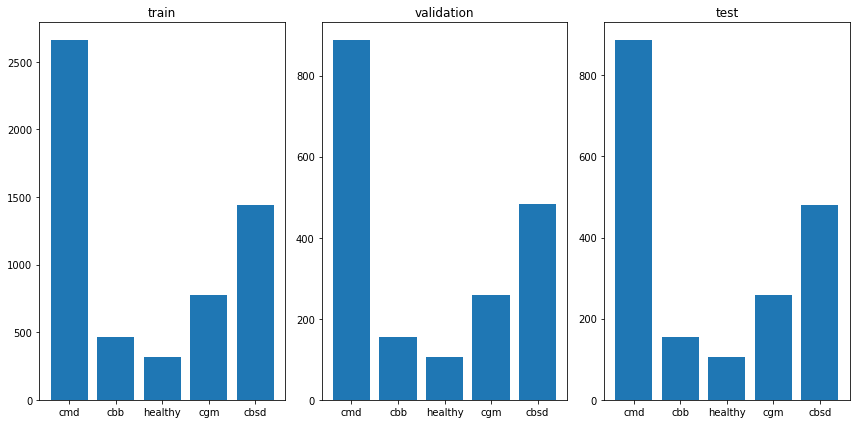

In [ ]:
base_dir = '/content/cassavaleafdata'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

labels_dict = {
     "cbb": "Cassava Bacterial Blight (CBB)",
     "cbsd": "Cassava Brown Streak Disease (CBSD)",
     "cgm": "Cassava Green Mottle (CGM)",
     "cmd": "Cassava Mosaic Disease (CMD)",
     "healthy": "Healthy"
}

def show_labels(data_dir):
    data = os.listdir(data_dir)
    fig, ax = plt.subplots(1, len(data), figsize=(12,6))
    for idx in range(len(data)):
        sub_dir = os.path.join(data_dir, data[idx])
        labels = os.listdir(sub_dir)
        list_data = []
        for label in labels:
            image_files = list(paths.list_images(os.path.join(sub_dir, label)))
            list_data.append(len(image_files))
        ax[idx].bar(labels, list_data)
        ax[idx].set_title(data[idx])
        # ax[idx].axis('off')
    plt.tight_layout()
    plt.show()

show_labels(base_dir)

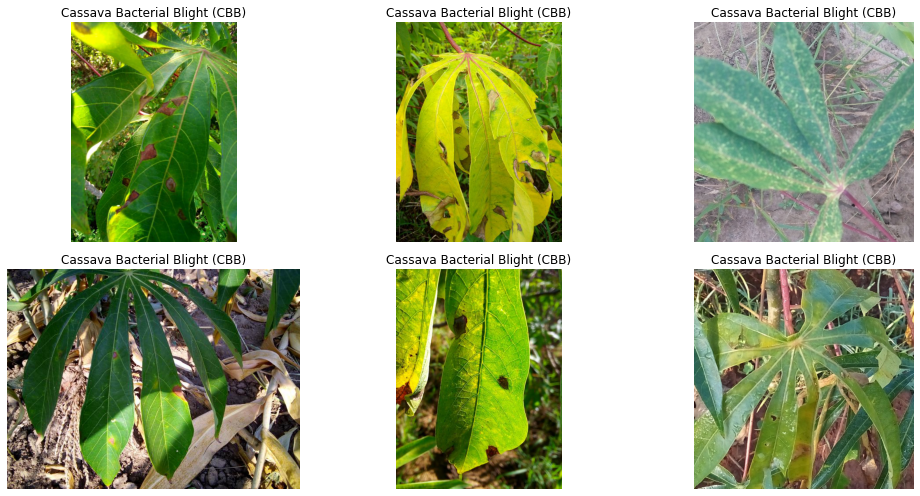

In [ ]:
def plot_images(data_dir, label, num_sample=6):
    data_dir = os.path.join(data_dir, label)
    image_files = list(paths.list_images(data_dir))[:num_sample]
    fig, ax = plt.subplots(2,num_sample//2, figsize=(14,7))
    for i, image_dir in enumerate(image_files):
        img = mpimg.imread(image_dir)
        label = image_dir.split('/')[-2]
        ax[i//(num_sample//2)][i%(num_sample//2)].imshow(img)
        ax[i//(num_sample//2)][i%(num_sample//2)].set_title(labels_dict[label])
        ax[i//(num_sample//2)][i%(num_sample//2)].axis('off')
    plt.tight_layout()
    plt.show()

plot_images(train_dir, label="cbb")

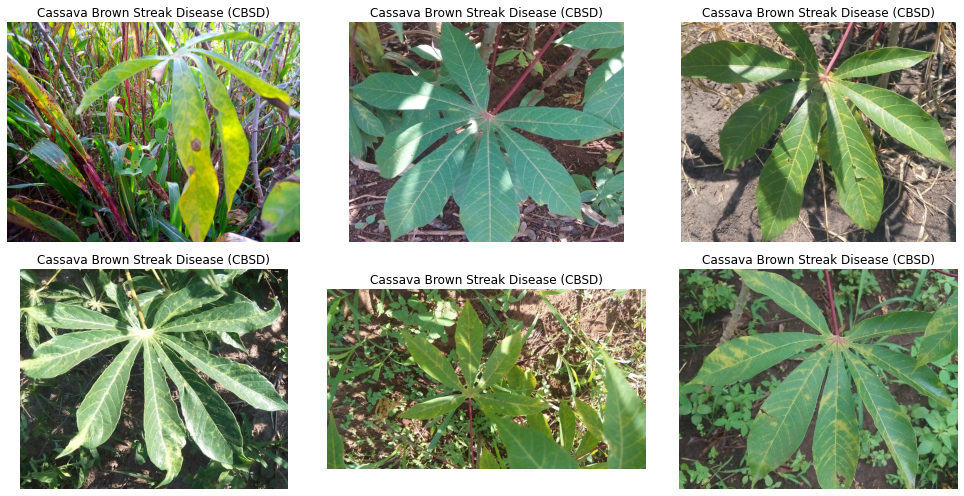

In [ ]:
plot_images(train_dir, label="cbsd")

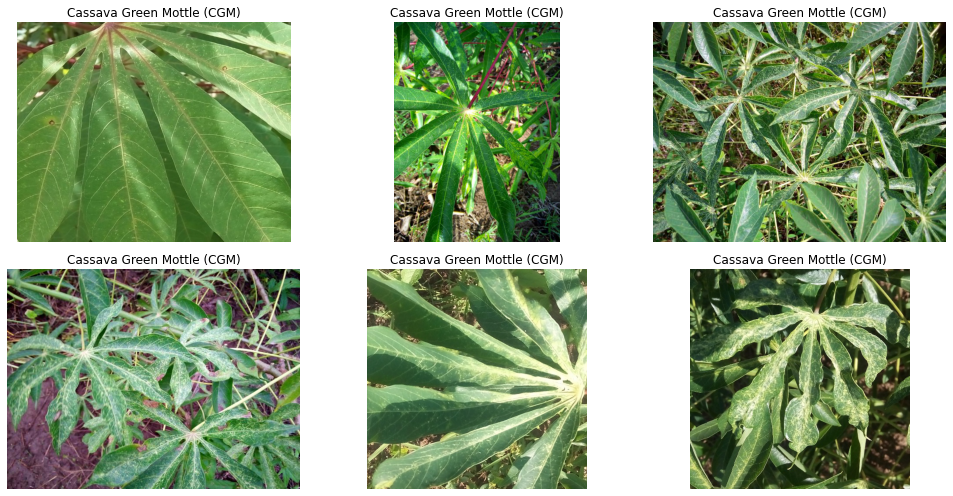

In [ ]:
plot_images(train_dir, label="cgm")

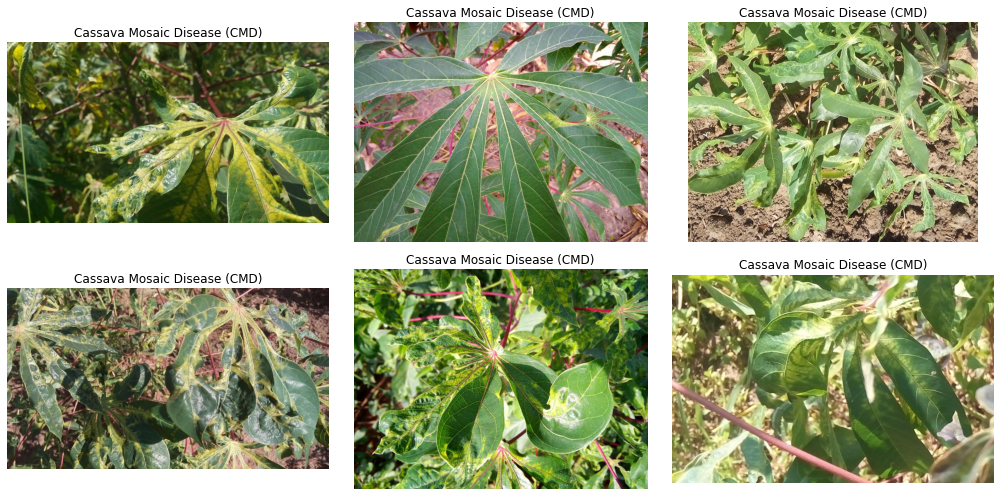

In [ ]:
plot_images(train_dir, label="cmd")

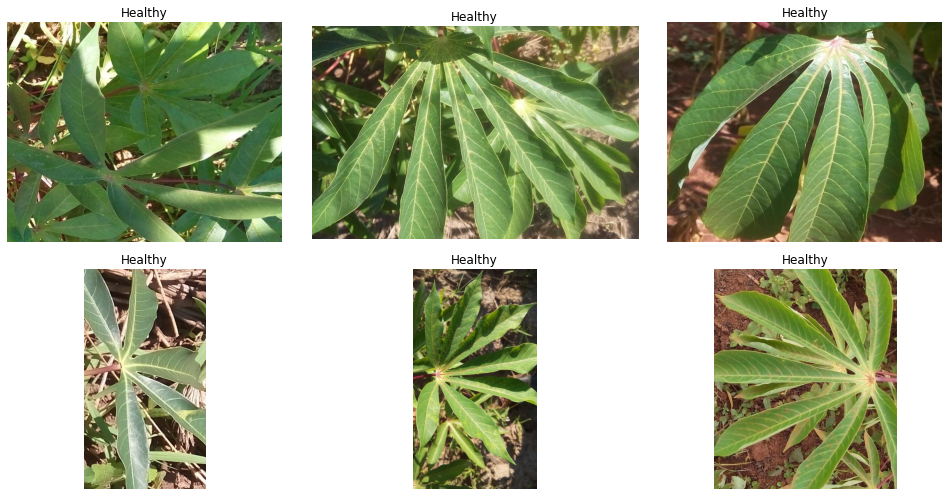

In [ ]:
plot_images(train_dir, label="healthy")

#### Processing

Found 5656 images belonging to 5 classes.
Found 1889 images belonging to 5 classes.
Found 1885 images belonging to 5 classes.


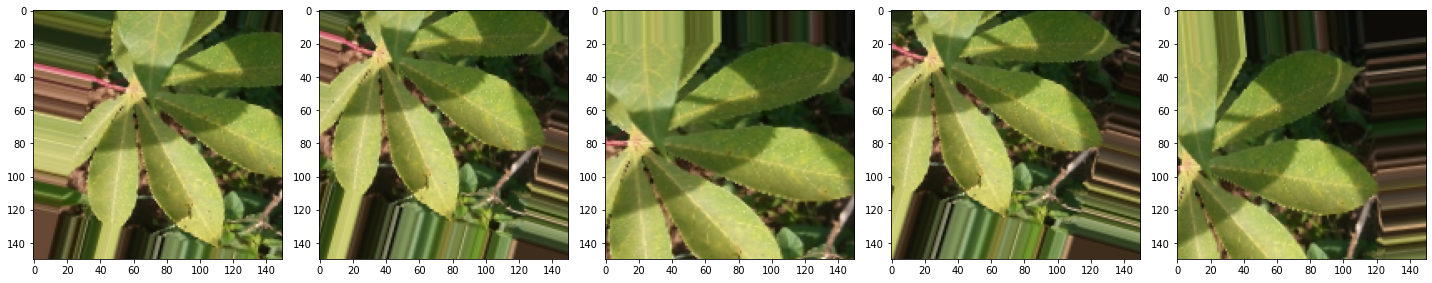

In [ ]:
img_size = 150
output_size = 5
batch_size = 128

train_datagen = ImageDataGenerator( rescale=1.0/255.0,
                                    rotation_range=30,
                                    zoom_range=0.15,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.15,
                                    horizontal_flip=True,
                                    fill_mode="nearest" )

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_dataloader = train_datagen.flow_from_directory(train_dir,
                                                     batch_size=batch_size,
                                                     target_size=(img_size, img_size))

valid_dataloader = val_datagen.flow_from_directory(valid_dir,
                                         batch_size=batch_size,
                                         target_size=(img_size, img_size))

test_dataloader = test_datagen.flow_from_directory(test_dir,
                                           batch_size=batch_size,
                                           shuffle = False,
                                           target_size=(img_size, img_size))

def show_aug(images):
    fig, axis = plt.subplots(1, 5, figsize=(20, 20))
    axis = axis.flatten()
    for img, ax in zip(images, axis):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

imgs = [train_dataloader[0][0][0] for i in range(5)]
show_aug(imgs)

#### Model LeNet

In [ ]:
lenet_model = tf.keras.models.Sequential(
            tf.keras.layers.Conv2D(), # C1 #your code here
            tf.keras.layers.AvgPool2D(), # S2 #your code here
            tf.keras.layers.Conv2D(), # C3 #your code here
            tf.keras.layers.AvgPool2D(), # S4 #your code here
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(), # C5 #your code here
            tf.keras.layers.Dense(), # F6 #your code here
            tf.keras.layers.Dense()) # Output layer, #your code here

lenet_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
lenet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 150, 150, 6)       456       
                                                                 
 average_pooling2d_2 (Averag  (None, 75, 75, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_16 (Conv2D)          (None, 71, 71, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 35, 35, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 19600)             0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [ ]:
num_epochs = 10

checkpoint_path = "/content/save_model/lenet_cassava.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            verbose=1,
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

history = lenet_model.fit(train_dataloader,
                                epochs = num_epochs,
                                validation_data = valid_dataloader,
                                callbacks=[model_checkpoint, learning_rate_reduction])

Epoch 1/10
45/45 [==============================] - ETA: 0s - loss: 1.2839 - accuracy: 0.4913
Epoch 1: val_accuracy improved from -inf to 0.55850, saving model to /content/save_model/lenet_cassava.h5
45/45 [==============================] - 72s 2s/step - loss: 1.2839 - accuracy: 0.4913 - val_loss: 1.2101 - val_accuracy: 0.5585 - lr: 0.0010
Epoch 2/10
45/45 [==============================] - ETA: 0s - loss: 1.2292 - accuracy: 0.5382
Epoch 2: val_accuracy improved from 0.55850 to 0.57226, saving model to /content/save_model/lenet_cassava.h5
45/45 [==============================] - 71s 2s/step - loss: 1.2292 - accuracy: 0.5382 - val_loss: 1.1826 - val_accuracy: 0.5723 - lr: 0.0010
Epoch 3/10
45/45 [==============================] - ETA: 0s - loss: 1.1997 - accuracy: 0.5530
Epoch 3: val_accuracy improved from 0.57226 to 0.59873, saving model to /content/save_model/lenet_cassava.h5
45/45 [==============================] - 71s 2s/step - loss: 1.1997 - accuracy: 0.5530 - val_loss: 1.1292 - va

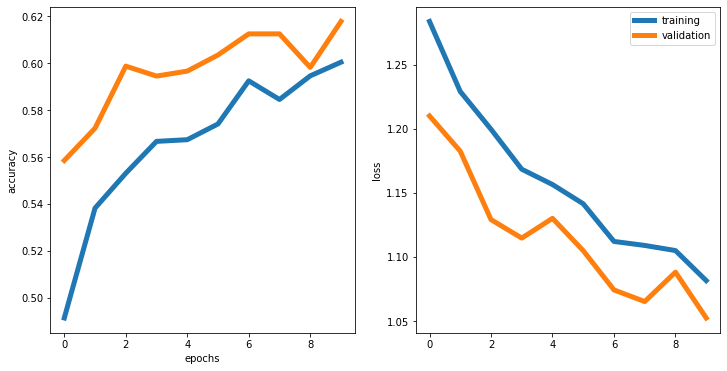

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(lenet_model.history.history['accuracy'])), lenet_model.history.history['accuracy'], linewidth = 5, label = "training")
axs[0].plot(range(len(lenet_model.history.history['accuracy'])), lenet_model.history.history['val_accuracy'], linewidth = 5, label = "validation")
axs[1].plot(range(len(lenet_model.history.history['loss'])), lenet_model.history.history['loss'], linewidth = 5, label = "training")
axs[1].plot(range(len(lenet_model.history.history['loss'])), lenet_model.history.history['val_loss'], linewidth = 5, label = "validation")
axs[0].set_xlabel("epochs")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")
axs[1].set_ylabel("loss")
plt.legend()

In [ ]:
lenet_model.load_weights("/content/save_model/lenet_cassava.h5")
loss, accuracy = lenet_model.evaluate(test_dataloader, steps=len(test_dataloader), verbose=1)
test_pred = lenet_model.predict(test_dataloader)
confusion_matrix(test_pred.argmax(axis = 1), test_dataloader.labels)
report = classification_report(test_pred.argmax(axis = 1),
                      test_dataloader.labels,
                      labels = [0,1,2,3,4])
print(report)


15/15 [==============================] - 11s 766ms/step
              precision    recall  f1-score   support

           0       0.11      0.68      0.19        25
           1       0.70      0.57      0.63       588
           2       0.03      0.50      0.06        16
           3       0.93      0.66      0.77      1256
           4       0.00      0.00      0.00         0

    accuracy                           0.63      1885
   macro avg       0.35      0.48      0.33      1885
weighted avg       0.84      0.63      0.71      1885



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Model VGG-16

In [ ]:
vgg16_model = tf.keras.models.Sequential(
                # 1st Conv Block
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # 2nd Conv Block
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # 3rd Conv block
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # 4th Conv block
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # 5th Conv block
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # Fully connected layers
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(), #your code here
                tf.keras.layers.Dense(), #your code here
                tf.keras.layers.Dense() #your code here

vgg16_model.compile(optimizer='adam',loss="categorical_crossentropy", metrics=['accuracy'])
vgg16_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 conv2d_35 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 conv2d_37 (Conv2D)          (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 38, 38, 128)      0         
 g2D)                                                 

In [ ]:
num_epochs=10
checkpoint_path = "/content/save_model/vgg16_cassava.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            verbose=1,
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

history = vgg16_model.fit(train_dataloader,
                                epochs = num_epochs,
                                validation_data = valid_dataloader,
                                callbacks=[model_checkpoint, learning_rate_reduction])

Epoch 1/10
45/45 [==============================] - ETA: 0s - loss: 44.8625 - accuracy: 0.4188
Epoch 1: val_accuracy improved from -inf to 0.46956, saving model to /content/save_model/vgg16_cassava.h5
45/45 [==============================] - 136s 2s/step - loss: 44.8625 - accuracy: 0.4188 - val_loss: 1.3712 - val_accuracy: 0.4696 - lr: 0.0010
Epoch 2/10
45/45 [==============================] - ETA: 0s - loss: 1.3538 - accuracy: 0.4699
Epoch 2: val_accuracy did not improve from 0.46956
45/45 [==============================] - 83s 2s/step - loss: 1.3538 - accuracy: 0.4699 - val_loss: 1.3412 - val_accuracy: 0.4696 - lr: 0.0010
Epoch 3/10
45/45 [==============================] - ETA: 0s - loss: 1.3442 - accuracy: 0.4699
Epoch 3: val_accuracy did not improve from 0.46956

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
45/45 [==============================] - 83s 2s/step - loss: 1.3442 - accuracy: 0.4699 - val_loss: 1.3400 - val_accuracy: 0.4696 - lr: 0.0010
Epoc

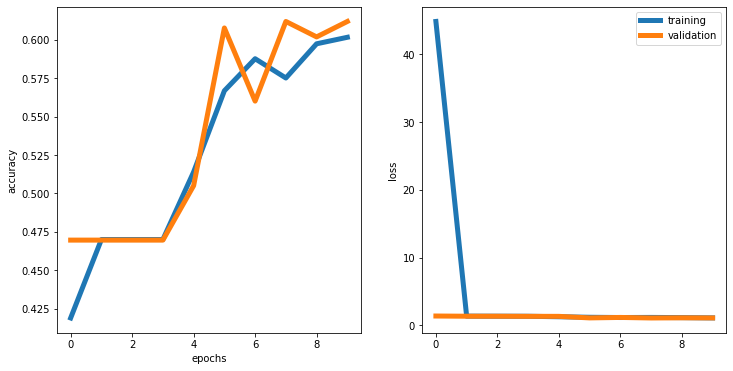

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(vgg16_model.history.history['accuracy'])), vgg16_model.history.history['accuracy'], linewidth = 5, label = "training")
axs[0].plot(range(len(vgg16_model.history.history['accuracy'])), vgg16_model.history.history['val_accuracy'], linewidth = 5, label = "validation")
axs[1].plot(range(len(vgg16_model.history.history['loss'])), vgg16_model.history.history['loss'], linewidth = 5, label = "training")
axs[1].plot(range(len(vgg16_model.history.history['loss'])), vgg16_model.history.history['val_loss'], linewidth = 5, label = "validation")
axs[0].set_xlabel("epochs")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")
axs[1].set_ylabel("loss")
plt.legend()

In [ ]:
vgg16_model.load_weights("/content/save_model/vgg16_cassava.h5")
loss, accuracy = vgg16_model.evaluate(test_dataloader, steps=len(test_dataloader), verbose=1)
test_pred = vgg16_model.predict(test_dataloader)
confusion_matrix(test_pred.argmax(axis = 1), test_dataloader.labels)
report = classification_report(test_pred.argmax(axis = 1),
                      test_dataloader.labels,
                      labels = [0,1,2,3,4])
print(report)

15/15 [==============================] - 13s 848ms/step
              precision    recall  f1-score   support

           0       0.01      1.00      0.03         2
           1       0.64      0.55      0.59       556
           2       0.00      0.00      0.00         0
           3       0.93      0.62      0.75      1327
           4       0.00      0.00      0.00         0

    accuracy                           0.60      1885
   macro avg       0.32      0.43      0.27      1885
weighted avg       0.84      0.60      0.70      1885



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Quiz

### Exercise 1

### Exercise 3

### Exercise 4 & 5

### Exercise 6-7-8